<a href="https://colab.research.google.com/github/chinnuzz77/Airplane_crashes-_analysis/blob/main/AIRPLANE_CRASHES_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # AIRPLANE CRASHES ANALYSIS

---
The dataset contains data of airplane accidents involving civil, commercial and 
military transport worldwide from 1908-09-17 to 2009-06-08.along with 



information of their type,operator,date,fatalities,aboard,location and summary.







In [ ]:
# import all the necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the data set
df = pd.read_csv('/content/drive/MyDrive/final _project/Airplane_Crashes_and_Fatalities_Since_1908.csv')
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [ ]:
df.shape       # shape of the data

(5268, 13)

In [ ]:
df.columns    # finding the columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [ ]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [ ]:
df.isnull().sum()           # checking the null values in data set

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

# CLEANING THE DATASET

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])            #Let's convert the 'Date' column to the appropriate format.
df['Date'] = df['Date'].dt.strftime("%d/%m/%Y")     

df['Year'] = pd.DatetimeIndex(df['Date']).year        #For visualization purposes, let's create a new column with just the year from the column 'Date'.

In [ ]:
df.Location = df.Location.fillna('UNKNOWN')
df.Operator = df.Operator.fillna('UNKNOWN')
df.Route = df.Route.fillna('UNKNOWN')
df.Type = df.Type.fillna('UNKNOWN')
df.Aboard = df.Aboard.fillna(0)           # we have some NaN values. For the numeric columns,we'll replace these values with 0. And in categorical colums we fill it with unknown.'''
df.Fatalities = df.Fatalities.fillna(0)
df['Ground'].fillna(0, inplace=True)
df.Registration = df.Registration.fillna('UNKNOWN')
df.Summary = df.Summary.fillna('UNKNOWN')
df.Time = df.Time.fillna('UNKNOWN')

In [ ]:
df.drop(['Flight #'], axis=1, inplace=True)     # drop two columns which is not necessary for our analysis
df.drop(['cn/In'], axis=1, inplace=True)

In [ ]:
df['Survived'] = df.Aboard - df.Fatalities      # adda new column to the dataset for further analysis

In [ ]:
df.isnull().sum()

Date            0
Time            0
Location        0
Operator        0
Route           0
Type            0
Registration    0
Aboard          0
Fatalities      0
Ground          0
Summary         0
Year            0
Survived        0
dtype: int64

In [ ]:
df.head(5)       # now our dataset look like this 

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground,Summary,Year,Survived
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,UNKNOWN,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,UNKNOWN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,06/08/1913,UNKNOWN,"Victoria, British Columbia, Canada",Private,UNKNOWN,Curtiss seaplane,UNKNOWN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,UNKNOWN,Zeppelin L-1 (airship),UNKNOWN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0
4,17/10/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,UNKNOWN,Zeppelin L-2 (airship),UNKNOWN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0


 # EXPLORING THE DATASET

* Yearly how many planes crashed?

In [ ]:
# total crashes per year
total_crashed_year = df[['Year', 'Date']].groupby('Year').count()
total_crashed_year = total_crashed_year.reset_index()
total_crashed_year.columns = ['Year', 'Crashes']

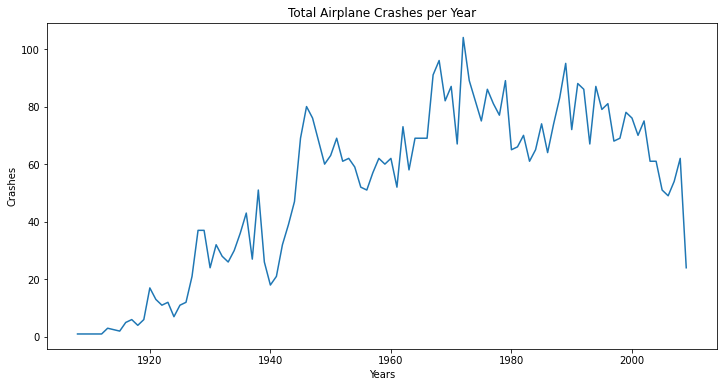

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'Year', y = 'Crashes', data=total_crashed_year)
plt.title('Total Airplane Crashes per Year')
plt.xlabel('Years')
plt.ylabel('Crashes')
plt.savefig('pic1',bbox_inches='tight')
plt.show()

In [ ]:
total_crashed_year[total_crashed_year['Crashes'] > 80]

,Year,Crashes
55,1967,91
56,1968,96
57,1969,82
58,1970,87
60,1972,104
61,1973,89
62,1974,82
64,1976,86
65,1977,81
67,1979,89


# insights
From the 40's, there's a significant increase in airplane crashes, which must likely be because of World War II (1939 - 1945). The highest peaks are between 1960 and 2000. The year with most accidents is 1972, with 104 occurences.

* How many deaths per year ? 

In [ ]:
# total plane crash deaths per year
pcdeaths = df[['Year', 'Fatalities']].groupby('Year').sum()
pcdeaths.reset_index(inplace=True)

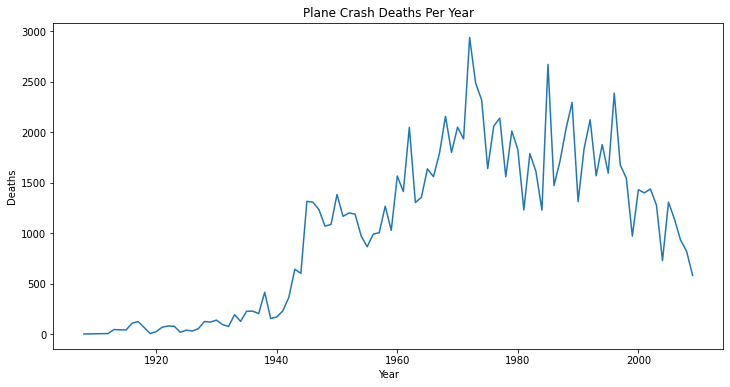

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'Year', y = 'Fatalities', data=pcdeaths)
plt.title('Plane Crash Deaths Per Year')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.savefig('pic2',bbox_inches='tight')
plt.show()

# insights
Here we can see the same pattern, the years that had the most accidents are also the ones with the most fatalities

* How many passengers in  crashed planes each year ?

In [ ]:
# total passengers in crashed planes per year
aboard_yearly = df[['Year', 'Aboard']].groupby('Year').sum()
aboard_yearly.reset_index(inplace = True)

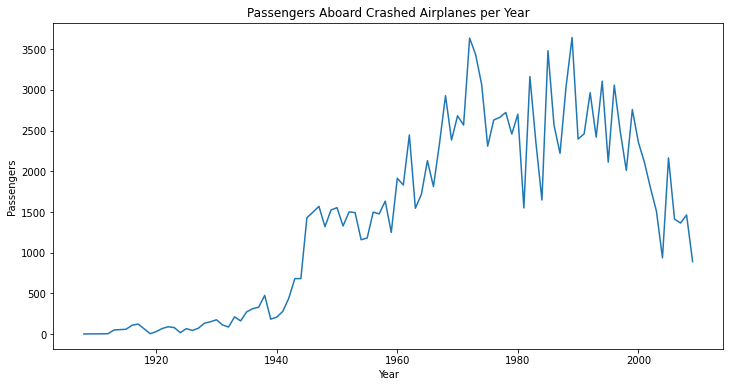

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x = 'Year', y='Aboard', data=aboard_yearly)
plt.title('Passengers Aboard Crashed Airplanes per Year')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.savefig('pic3',bbox_inches='tight')
plt.show()

# insights
From the 40's, the number of people aboard airplanes starts to increase. From 1960 to 2000 is where we have most people aboard, the same years with most plane crashes and fatalities. 

* Analysing the values of survived,fatalities,and ground 

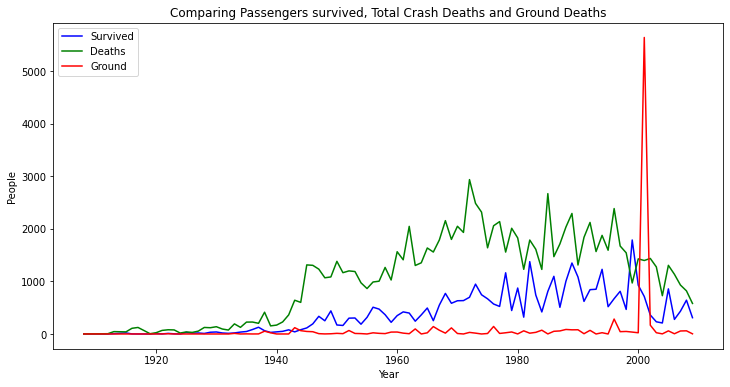

In [ ]:
compare = df[['Year', 'Fatalities', 'Survived', 'Ground']].groupby('Year').sum()
compare.reset_index(inplace=True)
plt.figure(figsize=(12,6))
sns.lineplot(x ='Year', y ='Survived', data=compare, color='blue', label='Survived')
sns.lineplot(x ='Year', y ='Fatalities', data=compare, color='green', label='Deaths')
sns.lineplot(x ='Year', y ='Ground', data=compare, color='red', label='Ground')
plt.title('Comparing Passengers survived, Total Crash Deaths and Ground Deaths')
plt.xlabel('Year')
plt.ylabel('People')
plt.savefig('pic4',bbox_inches='tight')
plt.show()

In [ ]:
df[df['Ground'] == 2750]

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground,Summary,Year,Survived
4803,11/09/2001,08:47,"New York City, New York",American Airlines,Boston - Los Angeles,Boeing 767-223ER,N334AA,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,0.0
4804,11/09/2001,09:03,"New York City, New York",United Air Lines,Boston - Los Angeles,Boeing B-767-222,N612UA,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,0.0


# insights
There's a peak close to 2000, with more than 5000 killed on the ground, way more than the number of fatalities.
This dreadful number of people killed on the ground is due to the tragic event of 9/11, where the Twin Towers were brought down by two planes hijacked by terrorists.

* which was the worst Operator ?

In [ ]:
Op_total = df.groupby('Operator')[['Operator']].count()                 
Op_total = Op_total.rename(columns={"Operator": "Count"})            
Op_total = Op_total.sort_values(by='Count', ascending=False).head(10)

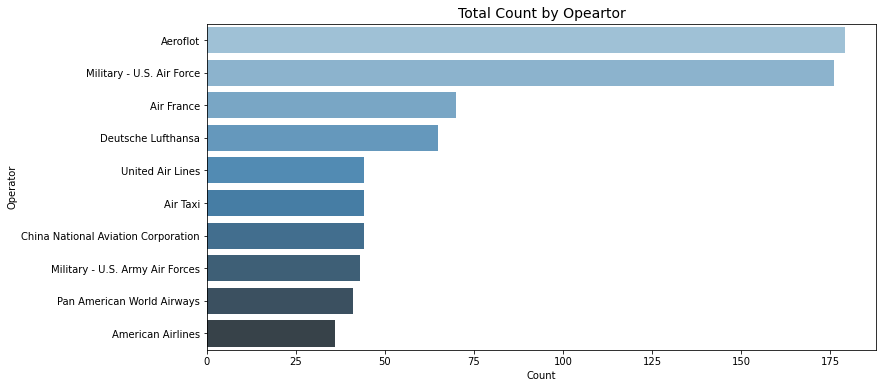

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=Op_total.index, x="Count", data=Op_total,palette="Blues_d",orient='h')
plt.xlabel('Count', fontsize=10)
plt.ylabel('Operator', fontsize=10)
plt.title('Total Count by Opeartor', loc='Center', fontsize=14)
plt.savefig('pic5',bbox_inches='tight')
plt.show()

# insights
Aeroflot is the most dangerous operator. People have high chances of dying if they flew with Aeroflot than any other operator.


* which was the worst year to fly ?

In [ ]:
w_yr=df.groupby('Year').agg({'Fatalities':'sum'}).sort_values(by='Fatalities', ascending =False)
w_yr.rename(columns={'Fatalities':'Total Fatalities per year'}).head(10)  #70s and 80s are among the worst years for airline industry. 1972 is the worst so far, causing maximum no. of fatalities 

,Total Fatalities per year
Year,
1972,2937.0
1985,2670.0
1973,2485.0
1996,2386.0
1974,2318.0
1989,2293.0
1968,2156.0
1977,2138.0
1992,2122.0


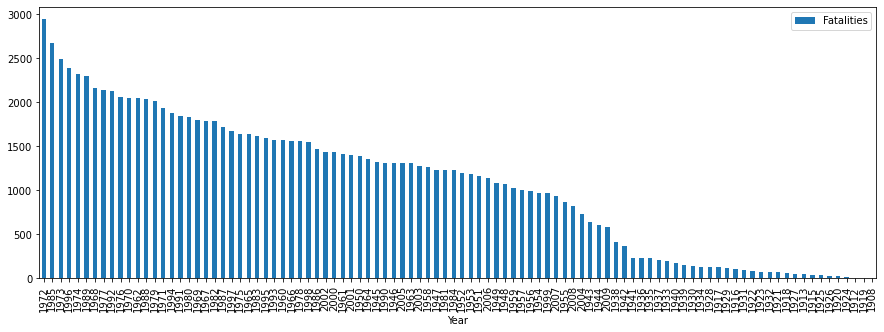

In [ ]:
wy=w_yr.plot(kind='bar',figsize=(15,5))
plt.savefig('pic6',bbox_inches='tight')
plt.show()

# insights 
70s and 80s are among the worst years for airline industry. 1972 is the worst so far, causing maximum no. of fatalities 

* which Type is used in the most crashed planes ?


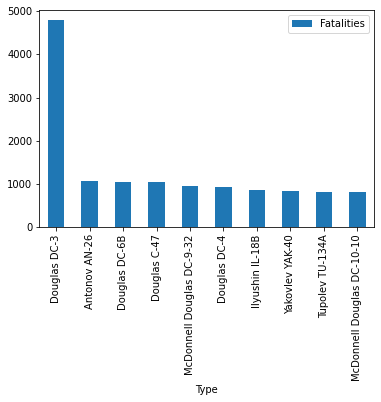

In [ ]:

d2 = df.groupby(['Type']).agg({'Fatalities':'sum'}).sort_values(by=['Fatalities'],ascending=False).head(10).plot.bar()

plt.savefig('pic7',bbox_inches='tight')
plt.show()

# insights 
Douglas DC-3 is atleast 5 times more probable to crash than any other type of aircraft

* which type of plane  has highest aboard ?

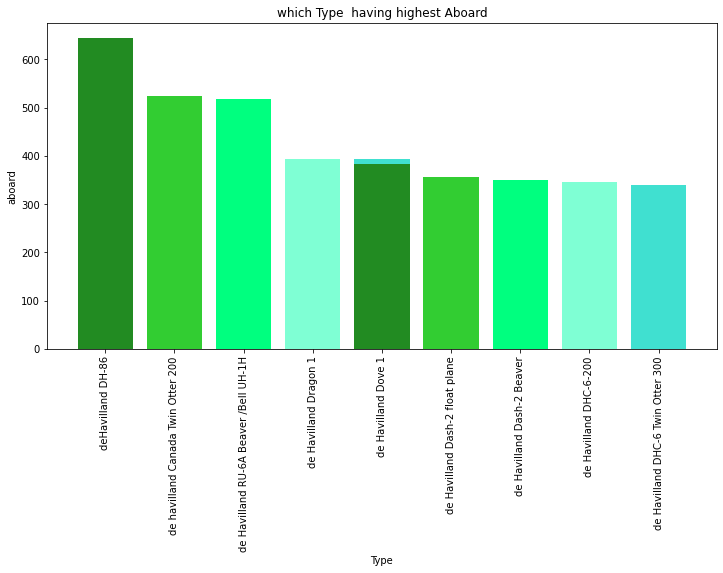

In [ ]:
a = df['Type'].sort_values(ascending=False)[:10]
b= df['Aboard'].sort_values(ascending=False)[:10]
plt.figure(figsize=(12,6))
plt.title('which Type  having highest Aboard')
plt.xlabel('Type')
plt.ylabel('aboard')
plt.bar(a,b,color=['forestgreen','limegreen','springgreen','aquamarine','turquoise'])
plt.xticks(rotation=90)
plt.savefig('pic8',bbox_inches='tight')
plt.show()

# insights 
dehavilland DH has most no.of aboard  , from the graph its clear that dehavilland type is most used and its variety types. This type and its variety is most demanding and this type can occupy more aboards than any other.

* which location has highest fatalities?




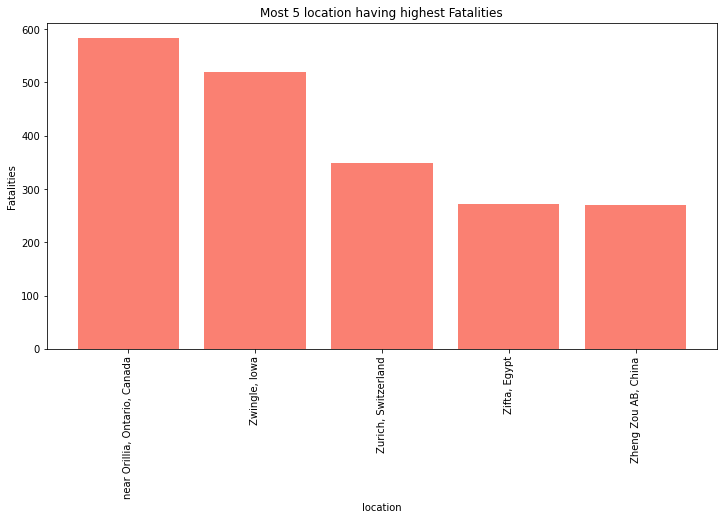

In [ ]:
e = df['Location'].sort_values(ascending=False)[:10]
f= df['Fatalities'].sort_values(ascending=False)[:10]
plt.figure(figsize=(12,6))
plt.title('Most 5 location having highest Fatalities')
plt.xlabel('location')
plt.ylabel('Fatalities')
plt.xticks(rotation=90)
plt.bar(e,f,color="salmon")
plt.savefig('pic9',bbox_inches='tight')
plt.show()

# insights
canada have the highest no.of crashes occured and has highest fatalities.And this is  most the riskiest location to fly.

* what is the relation between operator and fatalities?

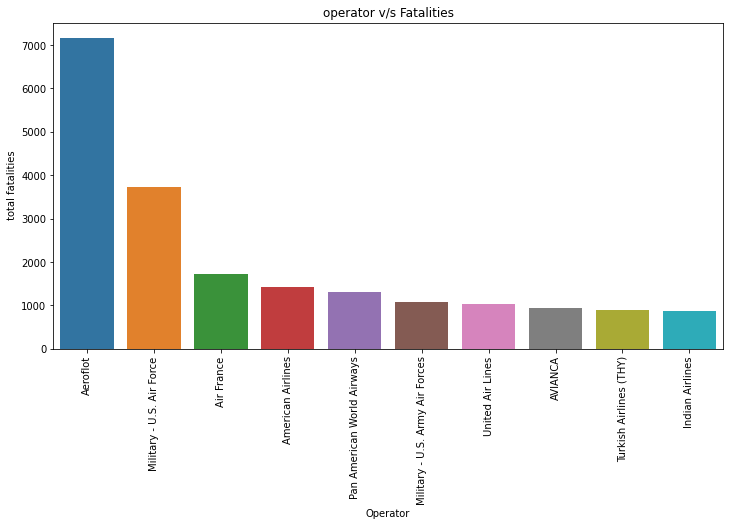

In [ ]:
operator_fatal = df[['Operator','Fatalities']].groupby(['Operator']).sum()
operator_fatal = operator_fatal['Fatalities'].sort_values(ascending=False)[:10]
operator_fatal_keys = operator_fatal.index
operator_fatal_val = operator_fatal.values
plt.figure(figsize=(12,6))
sns.barplot(x = operator_fatal_keys,y =operator_fatal_val)
plt.title('operator v/s Fatalities')
plt.xlabel('Operator')
plt.ylabel(' total fatalities')
plt.xticks(rotation=90)
plt.savefig('pic10',bbox_inches='tight')
plt.show()

# insights
The operator aerflot is the most dangerous operator and have high fatalities than others.second most is Militry U.S air force.

* which operator has highest survivors ?

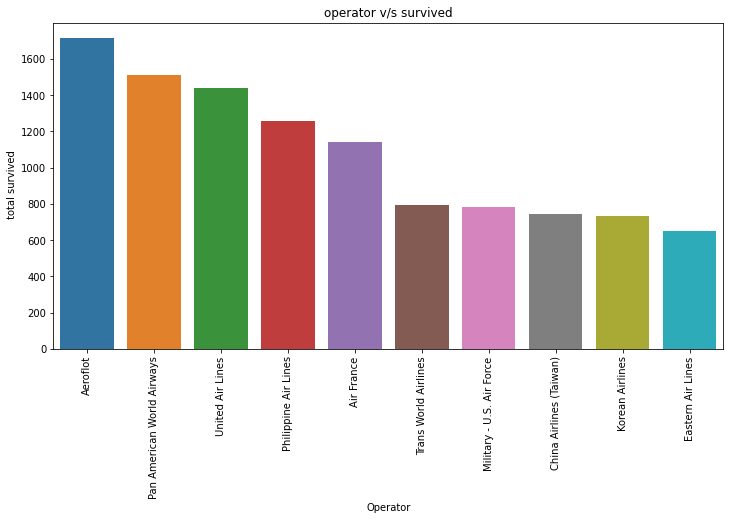

In [ ]:
operator_sur = df[['Operator','Survived']].groupby(['Operator']).sum()
operator_sur = operator_sur['Survived'].sort_values(ascending=False)[:10]
operator_sur_keys = operator_sur.index
operator_sur_val = operator_sur.values
plt.figure(figsize=(12,6))
sns.barplot(x = operator_sur_keys,y =operator_sur_val)
plt.title('operator v/s survived')
plt.xlabel('Operator')
plt.ylabel(' total survived')
plt.xticks(rotation=90)
plt.savefig('pic11',bbox_inches='tight')
plt.show()

# insight
as we know that aerflot is the  worst operator from our previous observations,eventhough there is a chance to suvival .in this graph the aerflot has the highest no.of survivers almost 1700 were survived .second most is pan american airways its around 1500 and so on.

* which year has highest survived?

In [ ]:
 c= df.groupby('Year')
 d= c['Survived'].agg(np.mean)
 print(d)

Year
1908     1.000000
1912     0.000000
1913     2.000000
1915    10.000000
1916     0.200000
          ...    
2005    16.823529
2006     5.653061
2007     8.018519
2008    10.370968
2009    12.916667
Name: Survived, Length: 98, dtype: float64


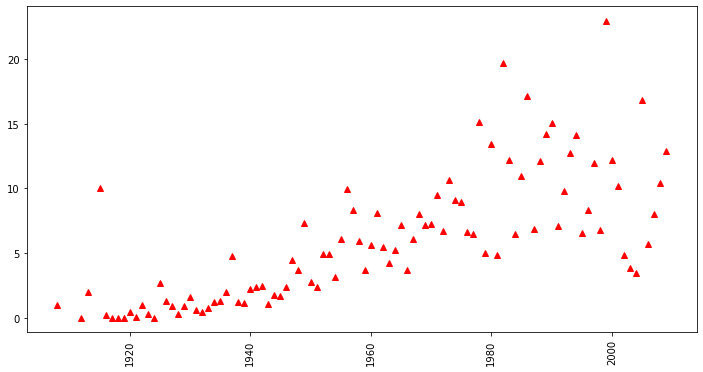

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(d,'g^',color='r')
plt.xticks(rotation=90)
plt.savefig('pic12',bbox_inches='tight')
plt.show()

# insights

Earlier the survivor rate is really low and after 1980 there is a change in the pattern .which means after 1980's survivor rate is highly increasing,its a good sighn for aviation industry .And people using airlways  also  feel safer . technological development is also  a factor.

# CONCLUSION
This analysis will helpful for both aviation industry as well as people who chooses air ways as their means of transporation.they get better understanding of how crashes happend ,is there any hope for survival in case anything happend, and how much safe it is?.
We analyze data of around 110 yrs of plane crashes .From this its clear that early 40's,and 70's to 80's are the worst period of aviation industry.lots of crashes and the fatalites rate also high, and also that time the world war 2 happed its also a reason for highest crash rates.Aeroflot was the worst operator and the planes have doglus c3  as their  type had the high chances to crash. the year which higher crashes were occr in 1972 around 104 crashes.Most accidents took place in  canada ,may  be which is th riskiest  location.The survived rates were increase from 1980's till   2009.which means technologies are improved the fatalites rates were decreased and also crash rates also decreased  its a good sign.There is so many reasons for air accidents may be its technical  issue ,air turbulance, terrorist attacks ,or may be piolts error.eventhough which is a efficient form of modern transpotation.